In [176]:
import pandas as pd
import glob

create_dataset = False
if(create_dataset):
    csv_files = glob.glob("requet_state_prediction_feature_inputs/*.csv")
    dfs=[]
    for file in csv_files:
        df = pd.read_csv(file)
        dfs.append(df)
    dfs= pd.concat(dfs)
    dfs.to_csv("requet_dataset.csv")
#csv_files

In [177]:
all_dfs = pd.read_csv("requet_dataset.csv")
all_dfs = all_dfs.drop("Unnamed: 0",1)
all_dfs = all_dfs.drop("Unnamed: 0.1",1)
all_dfs.columns
all_dfs = all_dfs.query("youtube_stimates != -1 & shaping ==1.6")

for i in range(10,210,10):
    all_dfs["mean_chunk_size_{}_second_window".format(i)] = all_dfs["mean_chunk_size_{}_second_window".format(i)]/1000000
    all_dfs["throughput_{}_second_window".format(i)] = all_dfs["throughput_{}_second_window".format(i)]/1000000
    all_dfs = all_dfs.query("ttfb_ratio_{}_second_window < 1".format(i))
#all_dfs.columns


/tmp/ipykernel_53305/3040309424.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  all_dfs = all_dfs.drop("Unnamed: 0",1)
/tmp/ipykernel_53305/3040309424.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  all_dfs = all_dfs.drop("Unnamed: 0.1",1)


In [193]:
#Requet_features
import autosklearn
import sklearn.model_selection
import sklearn.datasets
import sklearn.metrics
from sklearn.model_selection import train_test_split
features  = all_dfs.drop("youtube_stimates",1)
target = all_dfs["youtube_stimates"]
x_train, x_test, y_train, y_test=train_test_split(features,target,test_size=0.3,random_state=0)
x_train

x_train.columns

/tmp/ipykernel_53305/3760363074.py:7: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  features  = all_dfs.drop("youtube_stimates",1)


Index(['shaping', 'number_of_chunks_10_second_window',
       'mean_chunk_size_10_second_window',
       'mean_download_time_10_second_window', 'ttfb_10_second_window',
       'ttfb_ratio_10_second_window', 'throughput_10_second_window',
       'number_of_chunks_20_second_window', 'mean_chunk_size_20_second_window',
       'mean_download_time_20_second_window',
       ...
       'mean_download_time_190_second_window', 'ttfb_190_second_window',
       'ttfb_ratio_190_second_window', 'throughput_190_second_window',
       'number_of_chunks_200_second_window',
       'mean_chunk_size_200_second_window',
       'mean_download_time_200_second_window', 'ttfb_200_second_window',
       'ttfb_ratio_200_second_window', 'throughput_200_second_window'],
      dtype='object', length=121)

In [179]:
from sklearn.tree import DecisionTreeRegressor 
regressor = DecisionTreeRegressor(random_state = 0,splitter = "random") 
  
# fit the regressor with X and Y data

regressor.fit(x_train, y_train)
print("unlimited tree depth:{}".format(regressor.get_depth()))

unlimited tree depth:47


In [180]:
import matplotlib.pyplot as plt
from matplotlib import cycler
import matplotlib
def reset_rc():
    matplotlib.rcParams.update(matplotlib.rcParamsDefault)
#print(plt.rcParams.keys())
#cycles = cycler(color= ['348ABD', '7A68A6', 'A60628', '467821', 'CF4457', '188487', 'E24A33']) + cycler(marker=["o","s","D","*","1","P"  ,"x"])

def set_plot_params():
    cycles = cycler(color= ['348ABD', 'A60628', '7A68A6', '467821', 'CF4457', '188487', 'E24A33'])
    #cycles = cycler(color= ['348ABD', '7A68A6', 'A60628', '467821', 'CF4457', '188487', 'E24A33']) + cycler(marker=["o","s","D","*","1","P"  ,"x"])    
    params_dict = {
        'text.usetex': False,
        'font.family': 'Times New Roman',
        'font.serif': 'Times New Roman',
        'font.sans-serif': 'Times New Roman',
        'font.size': 8,
        'figure.figsize': [3.125, 1.93],  # Golden ratio
        #figure.figsize: 3.125, 1.56  # Squash for more space
        'legend.fontsize': 6,
        'legend.fancybox': False,
        'axes.linewidth': 0.5,
        'axes.prop_cycle': cycles,
                          # 348ABD : blue
                          # A60628 : red
                          # 7A68A6 : purple
                          # 467821 : green
                          # CF4457 : pink
                          # 188487 : turquoise
                          # E24A33 : orange
        'patch.linewidth': 0.5,
        'lines.linewidth': 2,
        'lines.marker':"o",
        'grid.linewidth': 0.1,
        'xtick.major.width': 0.25,
        'xtick.minor.width': 0.25,
        'ytick.major.width': 0.25,
        'ytick.minor.width': 0.25,
        'legend.numpoints': 1,
        'savefig.pad_inches':0,
        "lines.markersize":2
        
        
        
        }
    #cc = (cycler(color=list('rgb')) +
      #cycler(linestyle=['-', '--', '-.']))
    #cycles = cycler(color= ['348ABD', 'A60628', '7A68A6', '467821', 'CF4457', '188487', 'E24A33']) + cycler(marker=["o","v","1","s","P",  "*","x"])
    #for d in cycles:
        #print(d)
    plt.rcParams.update(params_dict)
    #plt.rc("axes", prop_cycle = cycles)
set_plot_params()

In [181]:
import seaborn as sns
import random
import matplotlib.colors as colors
import os
markers = ['o',">",""]
markers = [""]
#linestype = ["solid","dotted"]
linestype = ["solid"]
colors_list = list(colors._colors_full_map)[-20:-1]

def plot_cdf(data,label=None,lw = None,markevery = 0.1):
    #print(df.head())

    sns.kdeplot(label = label,data = data, cumulative = True,linestyle = random.choice(linestype),bw_method= 0.01,linewidth = lw, markevery = markevery)



The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


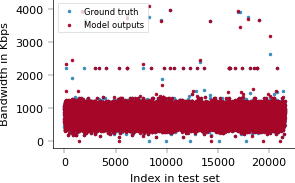

In [182]:
#reset_rc()
y_hat = regressor.predict(x_test)
import matplotlib.pyplot as plt

plt.scatter(range(len(y_test)),y_test)
plt.scatter(range(len(y_test)),y_hat)
plt.legend(["Ground truth","Model outputs"])
plt.xlabel("Index in test set")
plt.ylabel("Bandwidth in Kbps")
plt.savefig("scatter_deep.eps", dpi = 1200,bbox_inches ="tight")

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


47507
850.7971654275093
47


231

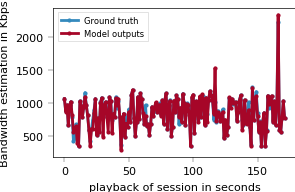

In [183]:
reset_rc()
set_plot_params()
plt.clf()
plt.plot(range(0,172),y_test[0:172])
plt.plot(range(0,172),y_hat[0:172])
print(regressor.tree_.node_count)
print(y_test.mean())
print(regressor.get_depth())
plt.legend(["Ground truth","Model outputs"])
#plt.title("Truth vs model estimates in a session, tree nodes = {}, overall RMSE = {}".format(regressor.tree_.node_count,int(sklearn.metrics.mean_squared_error(y_test,y_hat,squared=False))))
plt.xlabel("playback of session in seconds")
plt.ylabel("Bandwidth estimation in Kbps")
plt.savefig("session_truth.eps",dpi = 1200, bbox_inches = "tight")


int(sklearn.metrics.mean_squared_error(y_test,[y_test.mean()]*len(y_test),squared=False))

[0.0008839287648875658, 0.0009127468834148194, 0.0010797215219745474, 0.0010951571363768656, 0.0011126952973335214, 0.001124481322940942, 0.0011274553438149824, 0.001228528070495462, 0.001263923774748564, 0.0013020257094128386, 0.0013307520824795646, 0.0013471693107619221, 0.0014148405222375654, 0.0014315021599630526, 0.0014363587705258916, 0.0015160655665120855, 0.0015392607829286852, 0.001560210917240315, 0.001594634655985105, 0.0016144173273952742, 0.0016225240552409897, 0.0016370579366081904, 0.0016690325768429443, 0.001700823598105952, 0.0017701139108250424, 0.0017846070823910412, 0.001789842490648783, 0.0018055249563882928, 0.0018747275947856874, 0.001884917348650452, 0.0019140388364300937, 0.0019759283191884388, 0.001989250154817566, 0.0020125451191553784, 0.002036707721941265, 0.0020772410868535145, 0.00208849607443999, 0.002088561196651778, 0.0021048732348756933, 0.002144796465548363, 0.00217590125042961, 0.0021842161894108313, 0.002215706357737251, 0.0022614179612772205, 0.00

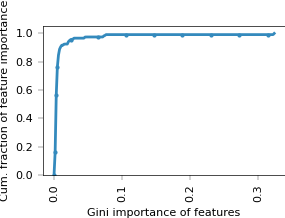

In [184]:
feat_importance = regressor.tree_.compute_feature_importances(normalize=True)
imp_dict = {}
feature_names =list(features.columns)
for i in range(len(feat_importance)):
    #print("{}: {}".format(feature_names[i],feat_importance[i]))
    imp_dict[feature_names[i]] = feat_importance[i]

imp_dict = {k: v for k, v in sorted(imp_dict.items(), key=lambda item: item[1])}
#print(imp_dict)

names = list(imp_dict.keys())[1:]
values = list(imp_dict.values())[1:]

#plt.bar(range(0,5*(len(imp_dict)-1),5), values, tick_label=names)
plt.xticks(rotation = 90)
#plt.ylabel("Normalised gini importance")
#plt.title("Normalised gini importance vs features")
#plt.savefig("feature_importance_deep.eps", dpi = 1200,bbox_inches ="tight")
plot_cdf(values)
print(values)
plt.xlabel("Gini importance of features")
plt.ylabel("Cum. fraction of feature importance")
plt.savefig("feature_importance_CDF.eps", dpi = 1200,bbox_inches ="tight")
plt.show()


In [185]:
import tqdm
rmses = []
alphas = []
nodes = []
for i in tqdm.trange(1,500,10):
    alpha = i
    alphas.append(alpha)
    regressor = DecisionTreeRegressor(random_state = 0,splitter = "random",ccp_alpha = alpha) 
    regressor.fit(x_train, y_train)
    y_hat = regressor.predict(x_test)
    rmse = sklearn.metrics.mean_squared_error(y_test,y_hat, squared=False)
    rmses.append(rmse)
    nodes.append(regressor.tree_.node_count)




100%|██████████| 50/50 [02:22<00:00,  2.85s/it]


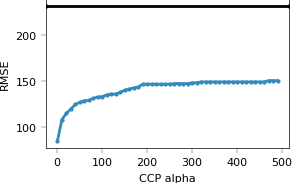

In [186]:
baseline = int(sklearn.metrics.mean_squared_error(y_test,[y_test.mean()]*len(y_test),squared=False))
plt.axhline(y = baseline,color = "black")
plt.plot(alphas, rmses)
plt.xlabel("CCP alpha")
plt.ylabel("RMSE")
plt.savefig("alph_vs_rmse.eps", dpi = 1200,bbox_inches ="tight")

8
27
146.6001915793069


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


14


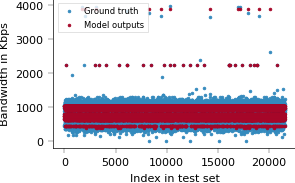

In [187]:
regressor = DecisionTreeRegressor(random_state = 0,splitter = "random",ccp_alpha = 200) 
regressor.fit(x_train, y_train)
y_hat = regressor.predict(x_test)
print(regressor.get_depth())
print(regressor.tree_.node_count)
print(rmses[20])
plt.scatter(range(len(y_test)),y_test)
plt.scatter(range(len(y_test)),y_hat)
plt.legend(["Ground truth","Model outputs"])
plt.xlabel("Index in test set")
plt.ylabel("Bandwidth in Kbps")
plt.savefig("scatter_simple.eps", dpi = 1200,bbox_inches ="tight")
print(regressor.get_n_leaves())

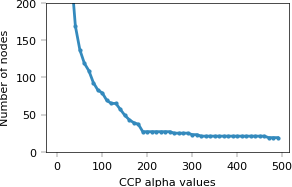

In [188]:
plt.ylim(0,200)
plt.ylabel("Number of nodes")
plt.xlabel("CCP alpha values")
plt.plot(alphas,nodes)
plt.savefig("alpha_vs_nodes.eps", dpi = 1200,bbox_inches ="tight")

[0.008894622003831123, 0.009594994545071733, 0.014017304336104548, 0.015846437511921503, 0.02999530690977417, 0.030103288509837515, 0.03659646269787052, 0.041743391605815715, 0.06872449303887476, 0.10927586500615781, 0.11340180671725997, 0.5218060271174808]
12
[0.008894622003831123, 0.009594994545071733, 0.014017304336104548, 0.015846437511921503, 0.02999530690977417, 0.030103288509837515, 0.03659646269787052, 0.041743391605815715, 0.06872449303887476, 0.10927586500615781, 0.11340180671725997, 0.5218060271174808]


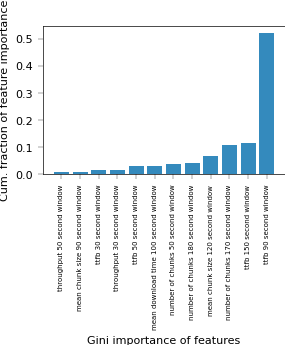

In [189]:
feat_importance = regressor.tree_.compute_feature_importances(normalize=True)
imp_dict = {}
feature_names =list(features.columns)
for i in range(len(feat_importance)):
    #print("{}: {}".format(feature_names[i],feat_importance[i]))
    imp_dict[feature_names[i]] = feat_importance[i]

imp_dict = {k: v for k, v in sorted(imp_dict.items(), key=lambda item: item[1])}
#print(imp_dict.items())

names = list(imp_dict.keys())[1:]

values = list(imp_dict.values())[1:]
values = [value for value in values if value !=0]
names = names[-1*len(values):]
names = [" ".join(name.split("_")) for name in names]
print(values)
print(len(values))

plt.bar(range(len(values)), values, tick_label=names)
plt.xticks(rotation = 90,fontsize = 5)
#plt.ylabel("Normalised gini importance")
#plt.title("Normalised gini importance vs features")
#plt.savefig("feature_importance_deep.eps", dpi = 1200,bbox_inches ="tight")
#plot_cdf(values)
print(values)
plt.xlabel("Gini importance of features")
plt.ylabel("Cum. fraction of feature importance")
plt.savefig("feature_importance_CDF_bar.eps", dpi = 1200,bbox_inches ="tight")
plt.show()

In [192]:
from sklearn import tree
from dtreeviz.trees import *
#print(list(y_test.values))

x = x_train.to_numpy()
y = y_train.to_numpy()
imp_dict = {k: v for k, v in sorted(imp_dict.items(), key=lambda item: item[1])}
#print(imp_dict.items())

names = list(imp_dict.keys())


print(x)
print(y)
print(names)
dot_data = sklearn.tree.export_graphviz(regressor, out_file=None, 
                                feature_names=x_train.columns,  
                                filled=True,class_names=True)
graph = graphviz.Source(dot_data, format="pdf") 
graph.render("decision_tree_graphivz")

[[ 1.6         0.          0.         ...  1.08095726  0.26919935
   0.90334399]
 [ 1.6         2.         10.797288   ...  1.12459813  0.30619935
   0.82456235]
 [ 1.6         3.          2.54182667 ...  0.66379574  0.2467935
   0.64324392]
 ...
 [ 1.6         0.          0.         ...  1.14920149  0.44248781
   0.68046068]
 [ 1.6         1.         17.157112   ...  0.75053781  0.54195489
   0.61421609]
 [ 1.6         2.          5.491256   ...  1.17117448  0.33367686
   0.82530115]]
[1059 1074  741 ... 1113  902 1049]
['shaping', 'number_of_chunks_10_second_window', 'mean_chunk_size_10_second_window', 'mean_download_time_10_second_window', 'ttfb_10_second_window', 'ttfb_ratio_10_second_window', 'throughput_10_second_window', 'number_of_chunks_20_second_window', 'mean_chunk_size_20_second_window', 'mean_download_time_20_second_window', 'ttfb_20_second_window', 'ttfb_ratio_20_second_window', 'throughput_20_second_window', 'number_of_chunks_30_second_window', 'mean_chunk_size_30_second

ValueError: Length of feature_names, 122 does not match number of features, 121